In [1]:
import pandas as pd
import warnings
import matplotlib.pyplot as plt
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import seaborn as sns

sns.reset_defaults()

warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
df = pd.read_csv('crypto_data.csv')

# filter if coin is actively being traded
df_trading = df[df['is_trading']].copy() # == True

# double checking
df_trading['is_trading'].value_counts()

# drop the col i was told to drop
df_trading.drop(['is_trading', 'coin_name', 'ticker'],axis=1, inplace=True)
df_trading.dropna(how='any',inplace=True)

# double checking
df_trading.columns

Index(['algorithm', 'proof_type', 'total_coins_mined', 'total_coin_supply'], dtype='object')

In [3]:
df_dummy = pd.get_dummies(df_trading)

print(len(df_dummy.columns))

use_cols = df_dummy.columns

437


Creating the dummy variables vastly increased the number of columns (from 4 to 437)

In [4]:

# df_norm = (df_dummy - df_dummy.mean())/df_dummy.std()
x = df_dummy.values
x = StandardScaler().fit_transform(x)
x.shape

(685, 437)

In [5]:
pc_vals = PCA(n_components=0.9)

pc_fit = pc_vals.fit_transform(x)
# pc_fit.shape

feature_cols = ['feature'+'_' + str(i) for i in range(pc_fit.shape[1])]
len(feature_cols)

325

The dimensionality reduction dropped the columns from 437 to 325.

In [6]:
pca_df = pd.DataFrame(
    data=pc_fit,
    columns=feature_cols
)

pca_df.head()



,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,feature_11,feature_12,feature_13,feature_14,feature_15,feature_16,feature_17,feature_18,feature_19,feature_20,feature_21,feature_22,feature_23,feature_24,feature_25,feature_26,feature_27,feature_28,feature_29,feature_30,feature_31,feature_32,feature_33,feature_34,feature_35,feature_36,feature_37,feature_38,feature_39,feature_40,feature_41,feature_42,feature_43,feature_44,feature_45,feature_46,feature_47,feature_48,feature_49,feature_50,feature_51,feature_52,feature_53,feature_54,feature_55,feature_56,feature_57,feature_58,feature_59,feature_60,feature_61,feature_62,feature_63,feature_64,feature_65,feature_66,feature_67,feature_68,feature_69,feature_70,feature_71,feature_72,feature_73,feature_74,feature_75,feature_76,feature_77,feature_78,feature_79,feature_80,feature_81,feature_82,feature_83,feature_84,feature_85,feature_86,feature_87,feature_88,feature_89,feature_90,feature_91,feature_92,feature_93,feature_94,feature_95,feature_96,feature_97,feature_98,feature_99,feature_100,feature_101,feature_102,feature_103,feature_104,feature_105,feature_106,feature_107,feature_108,feature_109,feature_110,feature_111,feature_112,feature_113,feature_114,feature_115,feature_116,feature_117,feature_118,feature_119,feature_120,feature_121,feature_122,feature_123,feature_124,feature_125,feature_126,feature_127,feature_128,feature_129,feature_130,feature_131,feature_132,feature_133,feature_134,feature_135,feature_136,feature_137,feature_138,feature_139,feature_140,feature_141,feature_142,feature_143,feature_144,feature_145,feature_146,feature_147,feature_148,feature_149,feature_150,feature_151,feature_152,feature_153,feature_154,feature_155,feature_156,feature_157,feature_158,feature_159,feature_160,feature_161,feature_162,feature_163,feature_164,feature_165,feature_166,feature_167,feature_168,feature_169,feature_170,feature_171,feature_172,feature_173,feature_174,feature_175,feature_176,feature_177,feature_178,feature_179,feature_180,feature_181,feature_182,feature_183,feature_184,feature_185,feature_186,feature_187,feature_188,feature_189,feature_190,feature_191,feature_192,feature_193,feature_194,feature_195,feature_196,feature_197,feature_198,feature_199,feature_200,feature_201,feature_202,feature_203,feature_204,feature_205,feature_206,feature_207,feature_208,feature_209,feature_210,feature_211,feature_212,feature_213,feature_214,feature_215,feature_216,feature_217,feature_218,feature_219,feature_220,feature_221,feature_222,feature_223,feature_224,feature_225,feature_226,feature_227,feature_228,feature_229,feature_230,feature_231,feature_232,feature_233,feature_234,feature_235,feature_236,feature_237,feature_238,feature_239,feature_240,feature_241,feature_242,feature_243,feature_244,feature_245,feature_246,feature_247,feature_248,feature_249,feature_250,feature_251,feature_252,feature_253,feature_254,feature_255,feature_256,feature_257,feature_258,feature_259,feature_260,feature_261,feature_262,feature_263,feature_264,feature_265,feature_266,feature_267,feature_268,feature_269,feature_270,feature_271,feature_272,feature_273,feature_274,feature_275,feature_276,feature_277,feature_278,feature_279,feature_280,feature_281,feature_282,feature_283,feature_284,feature_285,feature_286,feature_287,feature_288,feature_289,feature_290,feature_291,feature_292,feature_293,feature_294,feature_295,feature_296,feature_297,feature_298,feature_299,feature_300,feature_301,feature_302,feature_303,feature_304,feature_305,feature_306,feature_307,feature_308,feature_309,feature_310,feature_311,feature_312,feature_313,feature_314,feature_315,feature_316,feature_317,feature_318,feature_319,feature_320,feature_321,feature_322,feature_323,feature_324
0,-0.219913,-0.081231,2.717535e-14,0.021199,1.601076,-0.114183,-0.511110,-0.012741,0.725079,-1.499233,-0.280353,-0.596004,-0.502114,1.109581,-0.590038,0.003409,0.429746,0.002834,-1.155374e-13,5.297373e-14,-2.1

In [7]:
tsne = TSNE(
    n_components=2,
    n_iter=1500,
    perplexity=30,
    verbose=1,
    random_state=42
)

tsne_output = pd.DataFrame(tsne.fit_transform(pca_df.values))


[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 685 samples in 0.001s...
[t-SNE] Computed neighbors for 685 samples in 0.010s...
[t-SNE] Computed conditional probabilities for sample 685 / 685
[t-SNE] Mean sigma: 3.286128
[t-SNE] KL divergence after 250 iterations with early exaggeration: 86.474976
[t-SNE] KL divergence after 1500 iterations: 1.137368


In [8]:
tsne_output.columns = ['first','second']
tsne_output.reset_index(drop=True)
# len(tsne_output)

,first,second
0,-10.976893,0.152258
1,-8.235368,-0.051817
2,5.166496,-2.470280
3,-9.946312,14.240023
4,6.297185,-5.917758
...,...,...
680,28.092005,-11.706908
681,-34.084595,-5.522837
682,4.354868,-16.215101
683,14.493040,-11.342145


<AxesSubplot:xlabel='first', ylabel='second'>

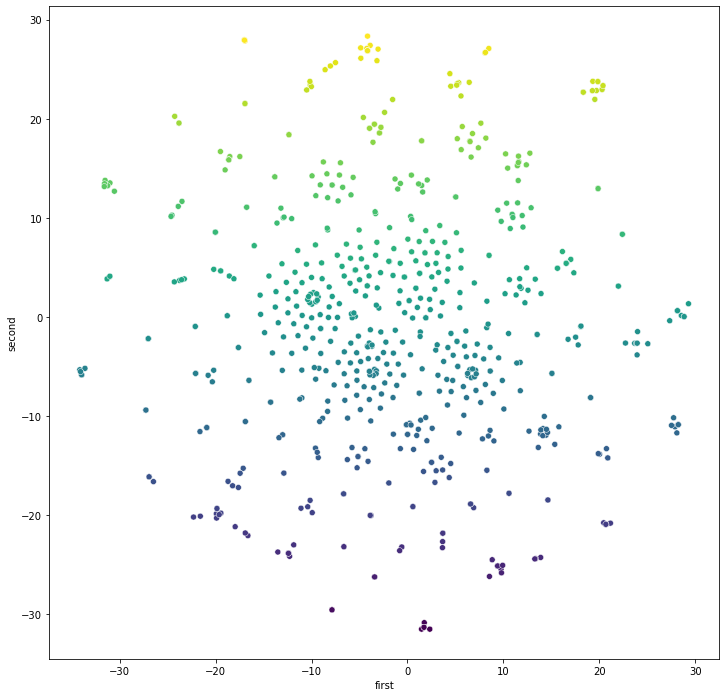

In [9]:
plt.figure(figsize=(12,12))

sns.scatterplot(
    x='first',
    y='second',
    c=tsne_output['second'],
    # hue='second',
    data=tsne_output,
    legend='full',
    cmap='viridis'
)


There are clear, discrete groups in the scatter plot.

In [10]:
distortions = []

k_range = range(1,10)

for k in k_range:
    kmean_model = KMeans(n_clusters=k)
    kmean_model.fit(tsne_output)
    distortions.append(kmean_model.inertia_)

Text(0.5, 1.0, 'Optimal K Value')

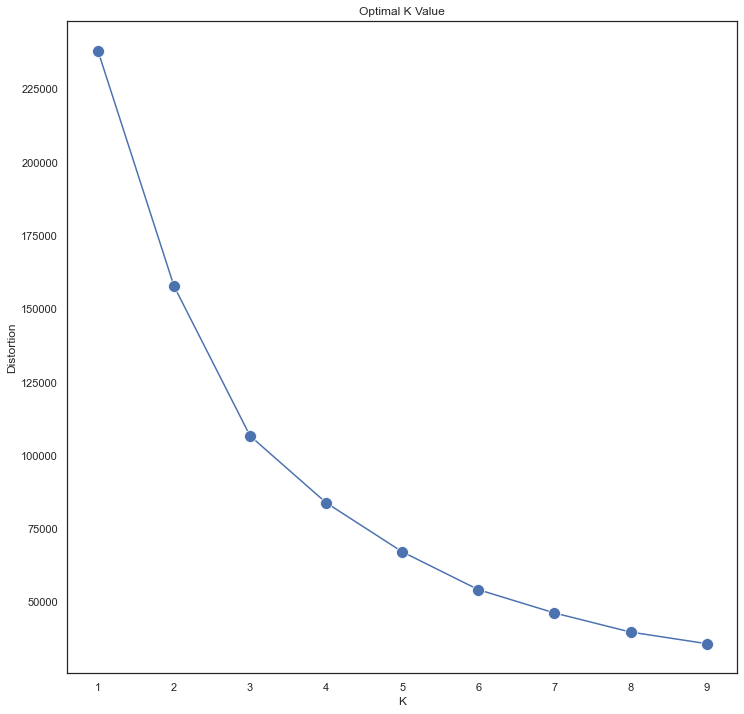

In [11]:
plt.figure(figsize=(12,12))

sns.set(style='white')

sns.lineplot(
    x=k_range,
    y=distortions,
    marker='o',
    markersize=12
)

plt.xlabel('K')
plt.ylabel('Distortion')
plt.title('Optimal K Value')

Since the inflection point is at k=3, we know that 3 is the optimal number to use for n_clusters

<AxesSubplot:xlabel='first', ylabel='second'>

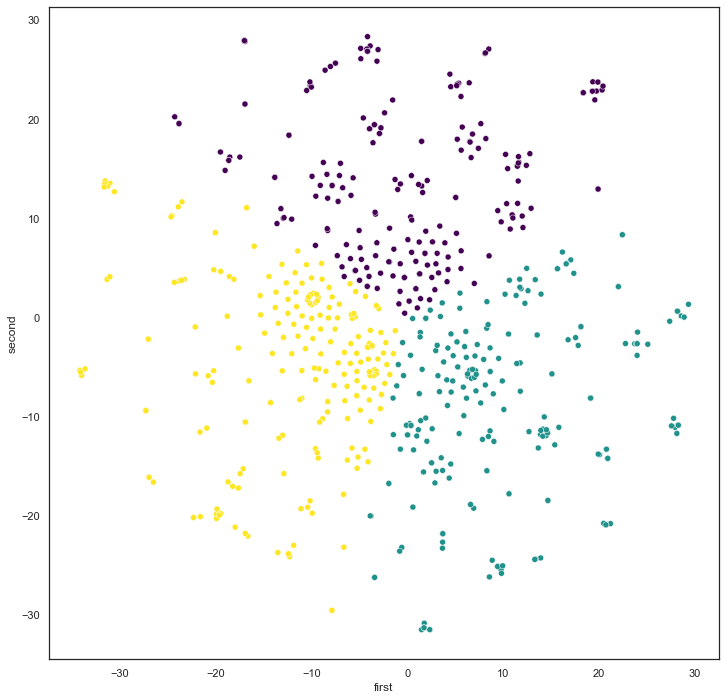

In [12]:
kmean_model = KMeans(n_clusters=3)
kmean_model.fit(tsne_output)

plt.figure(figsize=(12,12))

tsne_output['k_means'] = kmean_model.predict(tsne_output)

sns.scatterplot(
    tsne_output['first'],
    tsne_output['second'],
    c=tsne_output['k_means'],
    cmap='viridis',
    legend=True
)

The cryptocurrencies can be reliably clustered together; there are three very obvious clusters into which the currencies sort.